# QOSF Screening Task 1
### - By Sehmimul Hoque

## At first we import the required libraries

In [1277]:
import qiskit
import random
import numpy as np
from random import randint
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram,  plot_bloch_vector
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from scipy.optimize import dual_annealing # require for optimization in parts 2 and 3
%matplotlib inline

# Part 1

## Here we define the Quantum Circuit to produce an arbitrary quantum state depending on the chosen values of alpha and theta.
## The angles alpha and theta are chosen as shown below. 
## The purple vector represents the state.
![](bloch.jpg)
## By varying the parameters we can reach any point in the bloch sphere
## We know that an arbitray state can be modelled in the Bloch Sphere as:
# $\psi = \cos(\alpha/2)$ |0> + $\begin{equation}e^{i\theta}\end{equation}\sin(\alpha/2)$ |1>
## We can define $\theta$ to take values between $0$ to $2\pi$ and we can define $\alpha$ to take values between $0$ to $\pi$. This range covers every point of the Bloch Sphere

In [1278]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
def variational(theta, alpha):
    initial_state = [np.cos(alpha/2),np.exp(complex(0,theta))*np.sin(alpha/2)] # We define an arbitrary quantum state 
    if alpha==np.pi:
        initial_state = [0,1] # When alpha is pi, the state is the |1> state regardless of theta
    qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
    return initial_state 

## Here we show an example of the bloch sphere as described above with theta and alpha equal to 0 (i.e the |0> state)

# While plotting in the bloch sphere, we represent x,y and z in terms of spherical co-ordinates to get a point on the bloch sphere
# We take r (in spherical co-ordinates) to be 1 as the Bloch Sphere is a unit circle)

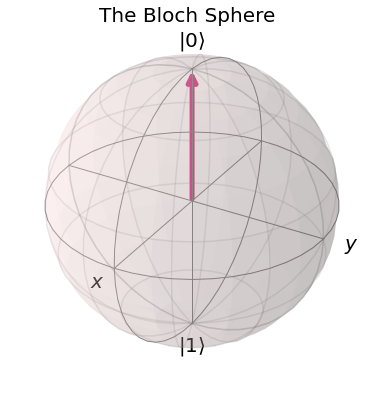

In [1279]:
alpha = 0
theta = 0
plot_bloch_vector([np.sin(alpha)*np.cos(theta),np.sin(alpha)*np.sin(theta),np.cos(alpha)], title="The Bloch Sphere")

In [1280]:
# Furthermore, as alpha and beta are 0, we get the |0> state, as also shown below
print(variational(theta, alpha)[0] ,"|0> +", variational(theta, alpha)[1], "|1>")

1.0 |0> + 0j |1>


## Now we show that any arbitrary state can be represented in the Bloch Sphere

### The Bloch Sphere is given below:

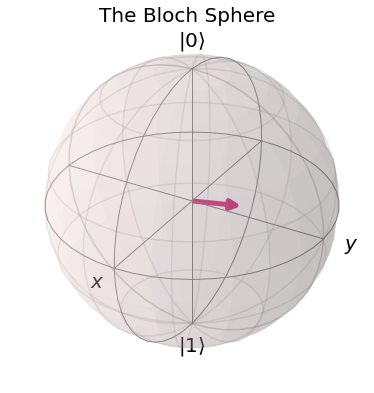

In [1281]:
theta = (random.randint(0, 628))/100
alpha = (random.randint(0, 314))/100
plot_bloch_vector([np.sin(alpha)*np.cos(theta),np.sin(alpha)*np.sin(theta),np.cos(alpha)], title="The Bloch Sphere")

### The state is also given below in the form $\psi = \cos(\alpha/2)$ |0> + $\begin{equation}e^{i\theta}\end{equation}\sin(\alpha/2)$ |1>


In [1282]:
print(variational(theta, alpha)[0] ,"|0> +", variational(theta, alpha)[1], "|1>")

0.5019019263232615 |0> + (-0.8622672462587396-0.06774697323400777j) |1>


## Thus we have provided a variational circuit and this is my answer to part 1.

# Part 2

## Here, we use the qubit from part 1 as one of the qubits of the SWAP test. Hence, we randomly choose alpha and theta. 

In [1283]:
theta = (random.randint(0, 628))/100
alpha = (random.randint(0, 314))/100
# theta = np.pi/2 # Uncomment this to use specific value of theta
# alpha = np.pi/2 # Uncomment this to use specific value of alpha

## Here, at first we define a swap_test function. One of the qubits of the swap test is the qubit from part 1. Hence that is already defined using the parameters in the code block immediately above.
## The other qubit depends on 2 parameters which are given by t and a in the function below.
## In the function, at first we define the state of the qubit using parameters  t and a using the relation 
# $\psi = \cos(\alpha/2)$ |0> + $\begin{equation}e^{i\theta}\end{equation}\sin(\alpha/2)$ |1>
## where t is theta and a is alpha of the Bloch Sphere.
## Then we proceed to build the circuit for the SWAP test.
## After that we simulate the circuit and take the measurement. Note that we get either |0> or |1> as the final measurement result.
## Now we know from https://en.wikipedia.org/wiki/Swap_test that the probability of getting |0> is 1 when the 2 states are the same in the SWAP test. 
## Now we want to reproduce the original state and thus we are only concerned about the number of times we get |0> out of the 1000 shots.
## This is why, I returned the number times we get |0> (counts['0']) at the end of the function.
## The code of the function is given below:

In [1284]:
def swap_test(t, a):
    state = [np.cos(a/2),np.exp(complex(0,t))*np.sin(a/2)]   # Define initial_state as |1>
    if a==np.pi:
        state = [0,1]
    q = QuantumRegister(3)
    creg = ClassicalRegister(1)
    qc_n = QuantumCircuit(q, creg)
    qc_n.reset(q[0])
    qc_n.initialize(variational(theta,alpha), 1)
    qc_n.initialize(state, 2)
    qc_n.h(q[0])
    qc_n.cswap(q[0], q[1], q[2])
    qc_n.h(q[0])
    qc_n.measure(q[0], [creg[0]])
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc_n, simulator, shots=1000)
    result = job.result()
    
    counts = result.get_counts(qc_n)
    
    return counts['0'], qc_n, counts

## We show an example of how the function works below. The value we get is the number of times we get |0> out of the 1000 shots

In [1285]:
swap_test(np.pi,np.pi/3)[0]

783

## We also show the circuit using this example

In [1286]:
circuit = swap_test(np.pi,np.pi/3)[1]
circuit.draw()

┌───┐   ┌───┐┌─┐
q2114948_0: ──────────────────|0>──────────────────┤ H ├─■─┤ H ├┤M├
            ┌─────────────────────────────────────┐└───┘ │ └───┘└╥┘
q2114948_1: ┤ initialize(0.91712,0.1181+0.38071j) ├──────X───────╫─
            └─────┬──────────────────────────┬────┘      │       ║ 
q2114948_2: ──────┤ initialize(0.86603,-0.5) ├───────────X───────╫─
                  └──────────────────────────┘                   ║ 
 c352493: 1/═════════════════════════════════════════════════════╩═
                                                                 0

## We also show this result in the histogram below for visualization

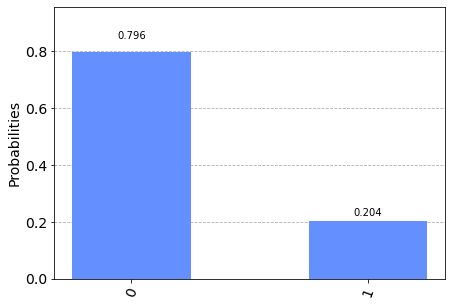

In [1287]:
counts = swap_test(np.pi,np.pi/3)[2]
plot_histogram(counts)

# We have shown how the functions work. Now we move to the part where we reproduce the state

## We do this by defining a cost function with parameters t and a.
## The objective (cost) function we want to minimize is 1000-(swap_test(t, a))[0].
## Recalling from the previous discussion, (swap_test(t, a))[0] gives the number of times we get |0> state out of 1000 shots.
## Additionally, recalling from previous discussion and referring to the link https://en.wikipedia.org/wiki/Swap_test, we also know that the probability of obtaining the |0> state is 1 when the 2 states are the same. 
## Thus, as we want to reproduce the original state, we want out (swap_test(t, a))[0] (count of |0>) to be 1000 ideally.
## In other words, we want to minimize 1000-(swap_test(t, a))[0]. This is why I have chose 1000-(swap_test(t, a))[0] as the objective function which we will minimize.

In [1288]:
def cost_function(parameters, *args):  
    t, a = parameters  
    return 1000-swap_test(t, a)[0]

## Here we perform optimization using dual annealing method.
## Note that the higher the number of ierations (maxiter), the closer our parameters are to the parameters of the state from part 1. 
## However, the time taken to optimize also increases with the number of iterations and thus I have kept the number of iterations quite low (1000). 
## Increasing maxiter will improve accuracy, but at the cost of time needed to perform computation.

In [1289]:
# optimization
maxiter = 1000
bnds = [(0,2*np.pi), (0,np.pi)]
results = dual_annealing(cost_function, bnds, maxiter = maxiter)
results # We get the result here.

     fun: 0
 message: ['Maximum number of iteration reached']
    nfev: 4130
    nhev: 0
     nit: 1000
    njev: 43
  status: 0
 success: True
       x: array([1.25876225, 0.83060062])

# Here, at first we write down the parameters we obtained by using the SWAP_test (t, a) and then write the actual paramaters from the circuit in part 1 (theta, alpha)

## parameters we obtained by using the SWAP_test (t, a)

In [1290]:
# Getting paratmeter t (theta of the new state)
print("t is: ", results.x[0])

t is:  1.258762247599961


In [1291]:
# Getting paratmeter a (theta of the new state)
print("a is: ", results.x[1])

a is:  0.8306006168413163


## actual paramaters from the circuit in part 1 (theta, alpha)

In [1292]:
# Getting paratmeter t (theta of the new state)
print("theta is: ", theta)

theta is:  1.27


In [1293]:
# Getting paratmeter a (theta of the new state)
print("alpha is: ", alpha)

alpha is:  0.82


# For comparison, we also give the bloch sphere of the original qubit from the variational circuit (Blockh Sphere 0) and the qubit obtained using SWAP_test (Bloch Sphere 1).

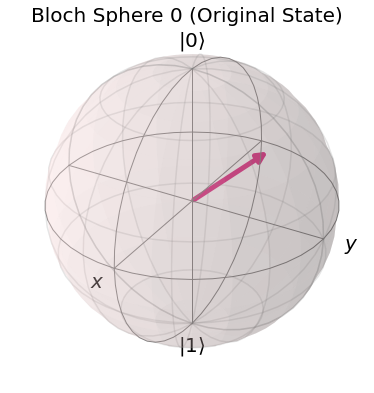

In [1294]:
plot_bloch_vector([np.sin(alpha)*np.cos(theta),np.sin(alpha)*np.sin(theta),np.cos(alpha)], title="Bloch Sphere 0 (Original State)")

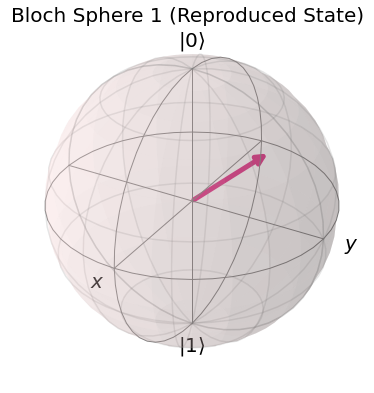

In [1295]:
plot_bloch_vector([np.sin(results.x[1])*np.cos(results.x[0]),np.sin(results.x[1])*np.sin(results.x[0]),np.cos(results.x[1])], title="Bloch Sphere 1 (Reproduced State)")

## Hence, using $\psi = \cos(\alpha/2)$ |0> + $\begin{equation}e^{i\theta}\end{equation}\sin(\alpha/2)$ |1>, we have that the state of the qubit whose parameters we found using the SWAP_test:

In [1296]:
t = results.x[0]
a = results.x[1]
print(np.cos(a/2), "|0> +", np.exp(complex(0,t))*np.sin(a/2), "1>")

0.9149951979002825 |0> + (0.12386170538818002+0.38398185602675894j) 1>


## We also give the state of the original qubit whose state we obtained from the variational circuit.

In [1297]:
print(np.cos(alpha/2), "|0> +", np.exp(complex(0,theta))*np.sin(alpha/2), "1>")

0.9171208228166051 |0> + (0.1181003196513995+0.3807121102019615j) 1>


# The actual parameters alpha and theta are:

In [1298]:
print("Theta is: ", theta, "and Alpha is ", alpha,".")

Theta is:  1.27 and Alpha is  0.82 .


# Here we write the parameters of the reproduced state.


## Here, t represents the angle theta and a represents the angle alpha of the state. Both of the estimated parameters have an uncertainty of approximately 0.1 with 1000 iterations. 0.1 is like an upper bound for the uncertainty. In most cases, the uncertainty is much lower.

In [1299]:
print("The parameters are t = ", t, "and a = ", a)

The parameters are t =  1.258762247599961 and a =  0.8306006168413163


# The differences between actual and extimated parameters are:

In [1300]:
del_theta = abs(theta - t)
print("Difference in theta: ", del_theta)

Difference in theta:  0.011237752400039103


In [1301]:
del_alpha = abs(alpha - a)
print("Difference in alpha: ", del_alpha)

Difference in alpha:  0.010600616841316302


## We can see that the difference between the parameters is very small.
### This concludes my answer to part 2. 

# Part 3

## At first we find an arbitrary quantum state with n qubits. 
## So, the generated quantum state is of the form |a0 a1 a2 a3 ...>
## where a0, a1 ,a3 are elements of the array we define below (bit_string). 
## For example, bit_string[0] = a0, bit_string[1] = a1, bit_string[2] = a2 and so on.
# Note that the value of n below can be modified to make any string of arbitrary length.
# So, by varying n, the number of qubits in the state can be varied.

In [1302]:
n = random.randint(7,20) # I defined the state to have between 7 and 20 qubits. This can be easily modified by uncommenting and using n = some integer.
# n = 9
bit_string = []
for i in range(n):
    r = randint(0,1)
    bit_string.append(1*r)  

In [1303]:
# We show the bit string here (i.e. the quantum state here)
bit_string

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]

## Now, in this state, we have n qubits and the state is a product state, meaning that the state can be represented as 
## |a0 a1 a2 a3 ...> = (|a0>)(|a1>)(|a2>)(|a3>)...
## This means none of the n qubits in the state are entangled with each other. Thus, we can perform qubit-by-qubit SWAP test.
## The qubit_know function is the same as the variational function from part 1, but we give t here again for clarification. 
## The function takes in theta and alpha and returns the state of the qubit (which can be |0> or |1> only here)

In [1304]:
qc3 = QuantumCircuit(1)  # Create a quantum circuit with one qubit
def qubit_known(theta, alpha):
    initial_state = [np.cos(alpha/2),np.exp(complex(0,theta))*np.sin(alpha/2)]   # Define initial_state as |1>
    if alpha==np.pi:
        initial_state = [0,1]
    qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
    return initial_state

## Now the swap_test_bit_sting function is also the same as the swap_test function from part 2. However, I am giving it again here for clarification. 
## Here, at first we define a swap_test function. One of the qubits of the SWAP test is the qubit from part 1. Hence that is already defined.
## The other qubit depends on 2 parameters which are given by t and a in the function below.
## In the function, at first we define the state of the qubit from  t and a using the relation 
# $\psi = \cos(\alpha/2)$ |0> + $\begin{equation}e^{i\theta}\end{equation}\sin(\alpha/2)$ |1>
## where t is theta and a is alpha.
## Then we proceed to build the circuit for the SWAP test.
## After that we simulate the circuit and take the measurement. Note that we get either |0> or |1> as the final measurement result.
## Now we know from https://en.wikipedia.org/wiki/Swap_test that the probability of getting |0> is 1 when the 2 states are the same in the SWAP test. 
## Now we want to reproduce the original state and thus we are only concerned about the number of times we get |0> out of the 1000 shots.
## This is why, I returned the number times we get |0> (counts['0']) at the end of the function.
## The code of the function is given below:

In [1305]:
def swap_test_bit_string(t, a):
    state = [np.cos(a/2),np.exp(complex(0,t))*np.sin(a/2)]   # Define initial_state as |1>
    if a==np.pi:
        state = [0,1]
    q = QuantumRegister(3)
    creg = ClassicalRegister(1)
    qc_n3 = QuantumCircuit(q, creg)
    qc_n3.reset(q[0])
    qc_n3.initialize(qubit_known(theta_1,alpha_1), 1)
    qc_n3.initialize(state, 2)
    qc_n3.h(q[0])
    qc_n3.cswap(q[0], q[1], q[2])
    qc_n3.h(q[0])
    qc_n3.measure(q[0], [creg[0]])
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc_n3, simulator, shots=1000)
    result = job.result()
    
    counts = result.get_counts(qc_n3)
    
    return counts['0'], qc_n3, counts

## Now we deine cost, which is also the same as the cost function from part 2, but given here again for clarification
## The objective function we want to minimize (from the cost function) is 1000-(swap_test(t, a))[0].
## Recalling from the previous discussion, (swap_test(t, a))[0] gives the number of times we get |0> state out of 1000.
## Additionally, recalling from previous discussion, referring to the link https://en.wikipedia.org/wiki/Swap_test, we also know that the probability of obtaining the |0> state is 1 when the 2 states are the same. 
## Thus, as we want to reproduce the original state, we want out (swap_test(t, a))[0] (count of |0>) to be 1000.
## In other words, we want to minimize 1000-(swap_test(t, a))[0]. This is why I have chose 1000-(swap_test(t, a))[0] as the objective function we want to minimize.

In [1306]:
def cost(parameters, *args):  
    t, a = parameters  
    return 1000-swap_test_bit_string(t, a)[0]

## Now this block of code below loops through all the n qubits and performs swap test in all the qubits. 
## results.x gives an array (t,a) where t is theta and a is alpha. Now, we look again at our definition of the angles in the Bloch Sphere. 
![](bloch.jpg)
## When alpha is greater than $\pi/2$, there is a greater probability of getting |1> is greater than the probability of getting |0>. 
## When alpha is lower than $\pi/2$, there is a greater probability of getting |0> is greater than the probability of getting |1>.
## I used this fact when finding whether the predicted quibit state for the i th qubit in the original bit string should be |0> or |1>.
## Also, I decreased the number of iterations, as we only need to know whether the state can be |0> or |1> only. This also speeds up the algorithm. 
## The number of iterationd can be increased for better accuracy. maxiter = 8 worked fine in my test cases.
## As the function loops, I intentionally printed the parameter (t,a) values with each iteration for so that the steps are clear.

In [1307]:
# loop

final_string = []
maxiter = 8
for i in range(len(bit_string)):
    if bit_string[i]==0:
        theta_1 = 0
        alpha_1 = 0
    if bit_string[i]==1:
        theta_1 = 0
        alpha_1 = np.pi
    qubit_known(theta_1, alpha_1)
    
    bnds = [(0,2*np.pi), (0,np.pi)]
    results = dual_annealing(cost, bnds, maxiter = maxiter)
    print(results.x)
    if results.x[1]>=0 and results.x[1]<=np.pi/2:
        final_string.append(0)
    else:
        final_string.append(1) 
final_string

[0.45385835 3.11034078]
[4.30666267 3.08795329]
[0.61135787 3.07440594]
[4.34402927 2.9804053 ]
[1.86074557 2.71433731]
[4.24008275 2.56692445]
[6.02175321 0.15045817]
[2.57906918 0.13398681]
[0.00828741 3.13498737]
[4.77917853 0.1242488 ]
[3.54662679 2.7968963 ]
[0.20667601 0.1065996 ]
[0.06942095 0.18005385]
[4.06370009 0.03259758]
[6.02045856 3.10590773]
[2.95698042 2.75365962]
[3.80265073 3.02007263]
[5.48992499 0.27452976]


[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]

# Our initial state was:

In [1308]:
bit_string

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]

# The state we predicted with the SWAP test is:

In [1309]:
final_string

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]

In [1310]:
# code to print number of qubiits in the state.
print("There were ", len(bit_string) ,"qubits in the state")

There were  18 qubits in the state


In [1311]:
# A simple code block which tells whether we have reproduced the state exactly or not.
def are_states_exactly_same(array_1, array_2):
    count = 0
    for i in range(len(array_1)):
        if array_1[i] == array_2[i]:
            count = count+1
    if count == len(array_1):
        print("Yes! We have reproduced the state exactly!")
    else:
        print("Unfortunately, a few qubits could not be reproduced correctly. Please increase maxiter in the code block where we find the final_string")
are_states_exactly_same(bit_string, final_string)

Yes! We have reproduced the state exactly!


# This concludes my answer to Part 3, and thus this concludes my answer to Task 1. I hope you have enjoyed this project! Thank you for going through my code!